## Introduction

This tutorial will introduce methods to analyse Stock Market for a company. 
The tutorial will include basic processing of the data obtained from yahoo finace, to analyse the stocks effectively.

Stock analysis is important from investors perspective to get some insights on the stocks and thus be able to use judgment to buy or sell stocks.
Through this tutorial we will not only understand how to compare stocks from different companies but also try to predict change in stock prices. There is lot of research going on in this area. 
We will try to understand and implment in a basic way. 

### Content
We will do some basic market analysis by visualising them and try to understand the trend.
We will consider for Big Data companies- Splunk, Teradata, Tableau and Datawatch for our analysis. We will get their stock details from yahoo finance.

1. [Installing and Loading Libraries](#Installing-and-Loading-Libraries)
2. [Loading Data and Processing](#Loading-Data-and-Processing)
3. [Plotting Data and Comparing](#Plotting-Data-and-Comparing)
4. [Correlating and Predicting Stock Prices with Google Trends](#Correlating-and-Predicting-Stock-Prices-with-Google-Trends)

### Installing and Loading Libraries

Before we get started, we need to install Pandas-Datareader to read the data remotely.
This is for pandas version 0.19.0 and above. Earlier pandas.io.data was used.

    $ pip install pandas-datareader

In [219]:
import pandas as pd

import numpy as np

from pandas_datareader import data

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo

#from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

import requests
import re
import nltk

import string

import collections

import math

import scipy.sparse as sp

from scipy import stats
# from __future__ import division

### Loading Data and Processing
We will load that the data using datareader and then process it to use it appropriately.
We have to remeber that while loading data, stock ticker symbol and not the whole company name.
This symbol is an abbreviated unique identifier.
Ticker for each comapny:
'DA7.F' - Datawatch ;
'TDC' - TeraData;
'DATA' - Tableau;
'SOU.F' - Splunk;

In [148]:
#get_data_yahoo gives us all the available data for the partiular comapny.
exampleData=data.get_data_yahoo('DA7.F')
exampleData.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-09-20,15.235,15.235,14.938,14.938,0,14.938
2012-09-21,15.125,15.262,15.125,15.262,0,15.262
2012-09-24,15.203,15.203,15.203,15.203,0,15.203
2012-09-25,15.480,15.480,15.154,15.154,0,15.154
2012-09-26,15.353,15.353,15.140,15.140,0,15.140


Now we look at the overview of the stock

In [149]:
exampleData.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,10.005467,10.070497,9.934841,9.994660,23.578751,9.994660
std,6.029740,6.070839,5.997754,6.029828,287.671846,6.029828
min,3.229000,3.314000,3.228000,3.314000,0.000000,3.314000
25%,5.296000,5.367000,5.273000,5.320000,0.000000,5.320000
50%,8.241000,8.305000,8.160000,8.244000,0.000000,8.244000
75%,11.542000,11.627000,11.412000,11.460000,0.000000,11.460000
max,27.210000,27.210000,27.210000,27.210000,9000.000000,27.210000


For the dataframe above: Open represents the opening price; Close for Closing price; Low for lowest price during the day; High for the highest price; Volume for the units sold or bought; Adj Clos for the Adjusted Closing price (for a particular date)

We will just consider the data for a year for our analysis

In [150]:
bigData_list = ['DA7.F','TDC','DATA','S0U.F']

#Intialiasing time frame for the data required
# end = datetime.now()
# start = datetime(end.year - 1,end.month,end.day)
end=datetime.now()
start=datetime(2015,1,1)
# dataWatch.ix[start:]

dataWatch=data.get_data_yahoo('DA7.F',start,end)
teraData=data.get_data_yahoo('TDC',start,end)
tableau=data.get_data_yahoo('DATA',start,end)
splunk=data.get_data_yahoo('S0U.F',start,end)

dataWatch.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,7.283,7.283,7.283,7.283,0,7.283
2015-01-02,7.344,7.344,7.344,7.344,0,7.344
2015-01-05,7.165,7.165,7.165,7.165,0,7.165
2015-01-06,6.819,6.819,6.819,6.819,0,6.819
2015-01-07,6.800,6.800,6.651,6.651,0,6.651


We will make columns for different moving averages of the Adj Closing prices and understand the importance while plotting it.

We will be using rolling_mean in pandas to get the moving average

Click on the link to understand Moving Averages- https://en.wikipedia.org/wiki/Moving_average 


In [151]:
ma=[10,30,50]
dataWatch["5days"]=dataWatch['Adj Close'].rolling(window=5,center=False).mean()
teraData["5days"]=dataWatch['Adj Close'].rolling(window=5,center=False).mean()
tableau["5days"]=tableau['Adj Close'].rolling(window=5,center=False).mean()
splunk["5days"]=splunk['Adj Close'].rolling(window=5,center=False).mean()

dataWatch["30days"]=dataWatch['Adj Close'].rolling(window=30,center=False).mean()
teraData["30days"]=dataWatch['Adj Close'].rolling(window=30,center=False).mean()
tableau["30days"]=tableau['Adj Close'].rolling(window=30,center=False).mean()
splunk["30days"]=splunk['Adj Close'].rolling(window=30,center=False).mean()

dataWatch["60days"]=dataWatch['Adj Close'].rolling(window=60,center=False).mean()
teraData["60days"]=dataWatch['Adj Close'].rolling(window=60,center=False).mean()
tableau["60days"]=tableau['Adj Close'].rolling(window=60,center=False).mean()
splunk["60days"]=splunk['Adj Close'].rolling(window=60,center=False).mean()


In [152]:
dataWatch.tail()

,Open,High,Low,Close,Volume,Adj Close,5days,30days,60days
Date,,,,,,,,,
2016-10-26,6.921,6.922,6.921,6.922,0,6.922,6.8516,6.574500,6.085283
2016-10-27,6.865,6.865,6.856,6.856,0,6.856,6.8564,6.586400,6.113267
2016-10-28,6.870,6.873,6.870,6.870,0,6.870,6.8758,6.597300,6.142050
2016-10-31,6.834,6.834,6.834,6.834,0,6.834,6.8698,6.604667,6.171567
2016-11-01,6.874,6.874,6.713,6.713,0,6.713,6.8390,6.608733,6.198967


We will be considering the Adjusted Closing price for some analysis.

So we store the Adj closing values in a dataframe and change the column names for better understanding. DW=Datawatch and TD=Teradata

In [153]:
closingVal=data.get_data_yahoo(bigData_list,start,end)['Adj Close']

closingVal.columns=(["DW","Tableau","Splunk","TD"])
closingVal.head()

,DW,Tableau,Splunk,TD
Date,,,,
2015-01-01,7.283,NaN,50.169,NaN
2015-01-02,7.344,85.980003,49.018,44.000000
2015-01-05,7.165,84.739998,48.619,43.070000
2015-01-06,6.819,83.360001,46.088,42.630001
2015-01-07,6.651,83.400002,48.012,42.779999


We will need the percentage change of closing price to make a fair comparison.

Hence we will make a new dataframe and use inbuilt function pct_change which gives us the percent change in values

In [154]:
changePctVal=(closingVal.pct_change())
changePctVal.head()

,DW,Tableau,Splunk,TD
Date,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,0.008376,NaN,-0.022942,NaN
2015-01-05,-0.024374,-0.014422,-0.008140,-0.021136
2015-01-06,-0.048290,-0.016285,-0.052058,-0.010216
2015-01-07,-0.024637,0.000480,0.041746,0.003519


### Plotting Data and Comparing
Now we use plot functions to comapre different stocks and understand them more clearly.

For plotting we use pandas.DataFrame.plot which visualises dataframe using matplotlib.
We will make legends as True and set a specific size for x and y ticks using figsize.


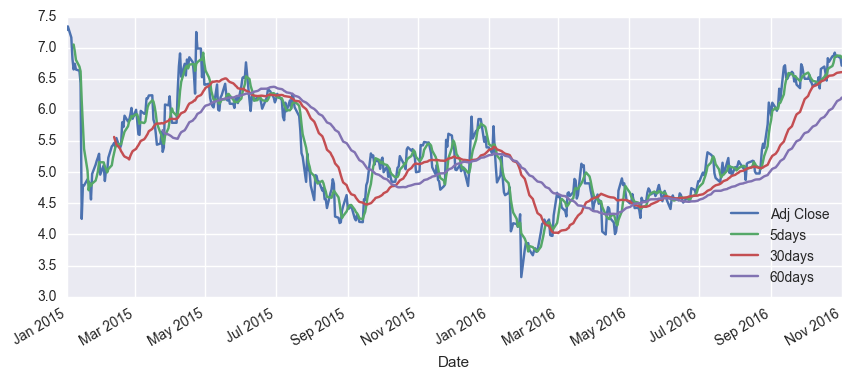

In [155]:
dataWatch[['Adj Close','5days','30days','60days']].plot(legend=True,figsize=(10,4))

Figue above shows us moving averages for different number of days to calculate moving averages.
As it can be seen with increase in number of days the curve becmes even smoother.
Moving averages helps us to remove the noise and indicates which way the price is moving.
More information can be obtained from : http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

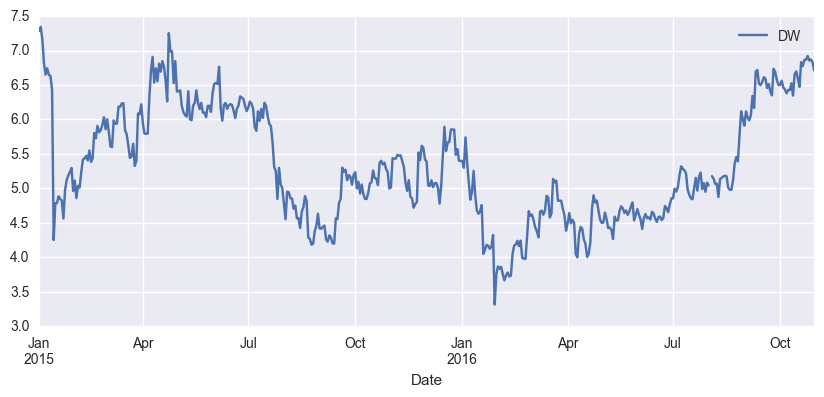

In [156]:
closingVal['DW'].plot(legend=True,figsize=(10,4))

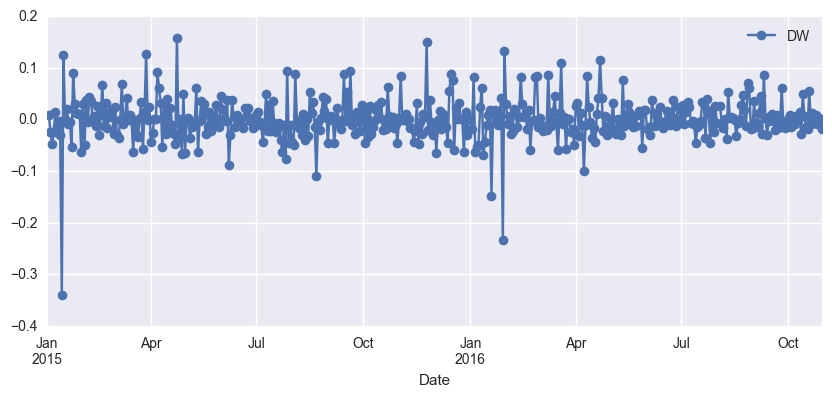

In [157]:
changePctVal['DW'].plot(legend=True,figsize=(10,4),marker='o')

As we see, the graph for absolute values plot gives us an idea of the price of the stock but the percentage change plot give us a better view about the daily changes in  the stock prices.
This gives us daily return analysis.

Lets have a look at the absolute and percentage prices of each company and compare them

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13a3d57d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13fe2ce90>], dtype=object)

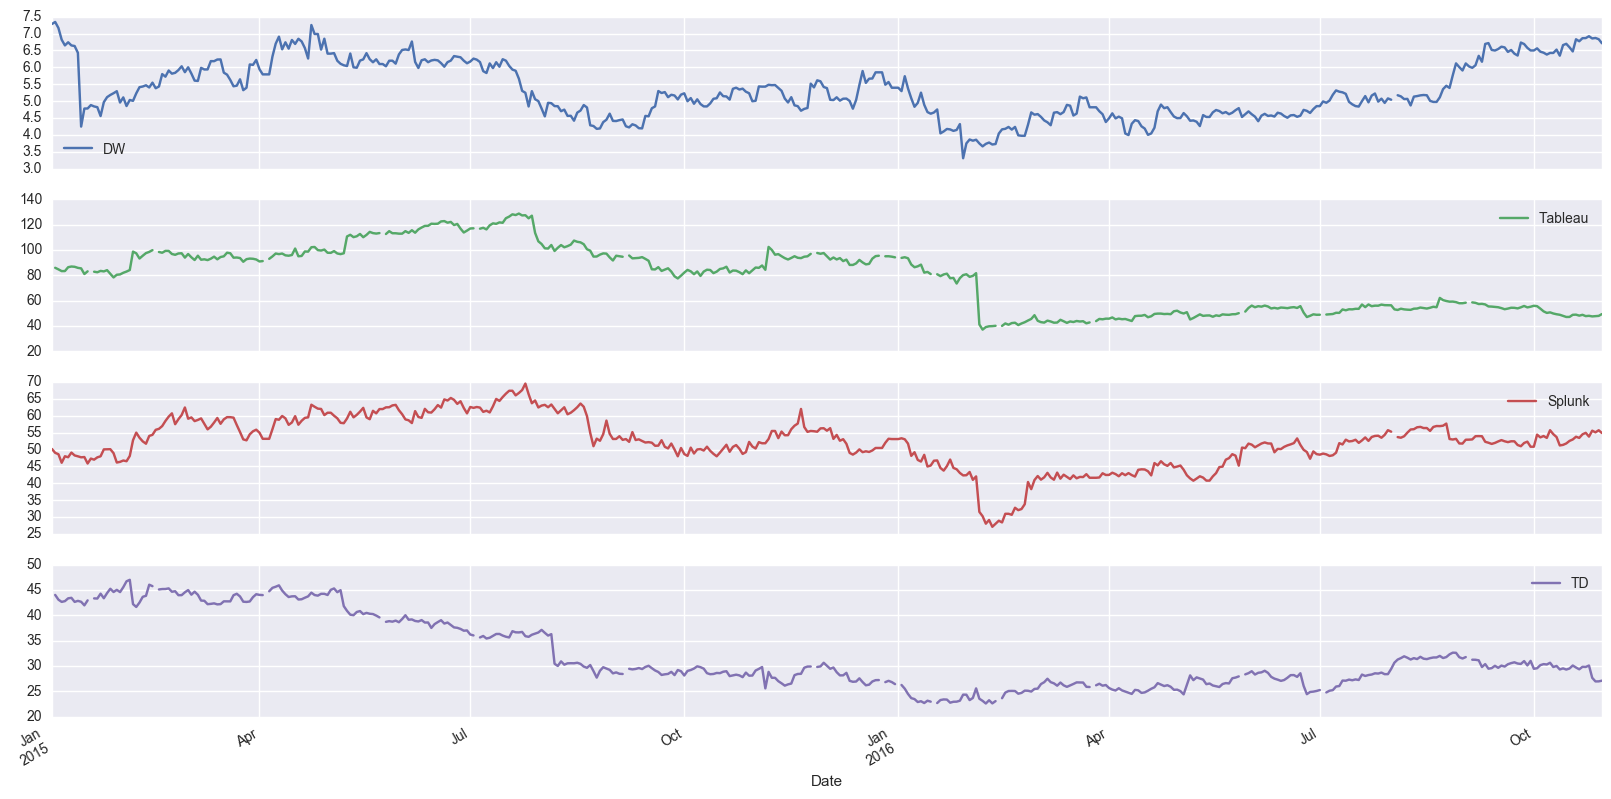

In [158]:
closingVal.plot(legend=True,figsize=(20,10),subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x140a394d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x140cdbc90>], dtype=object)

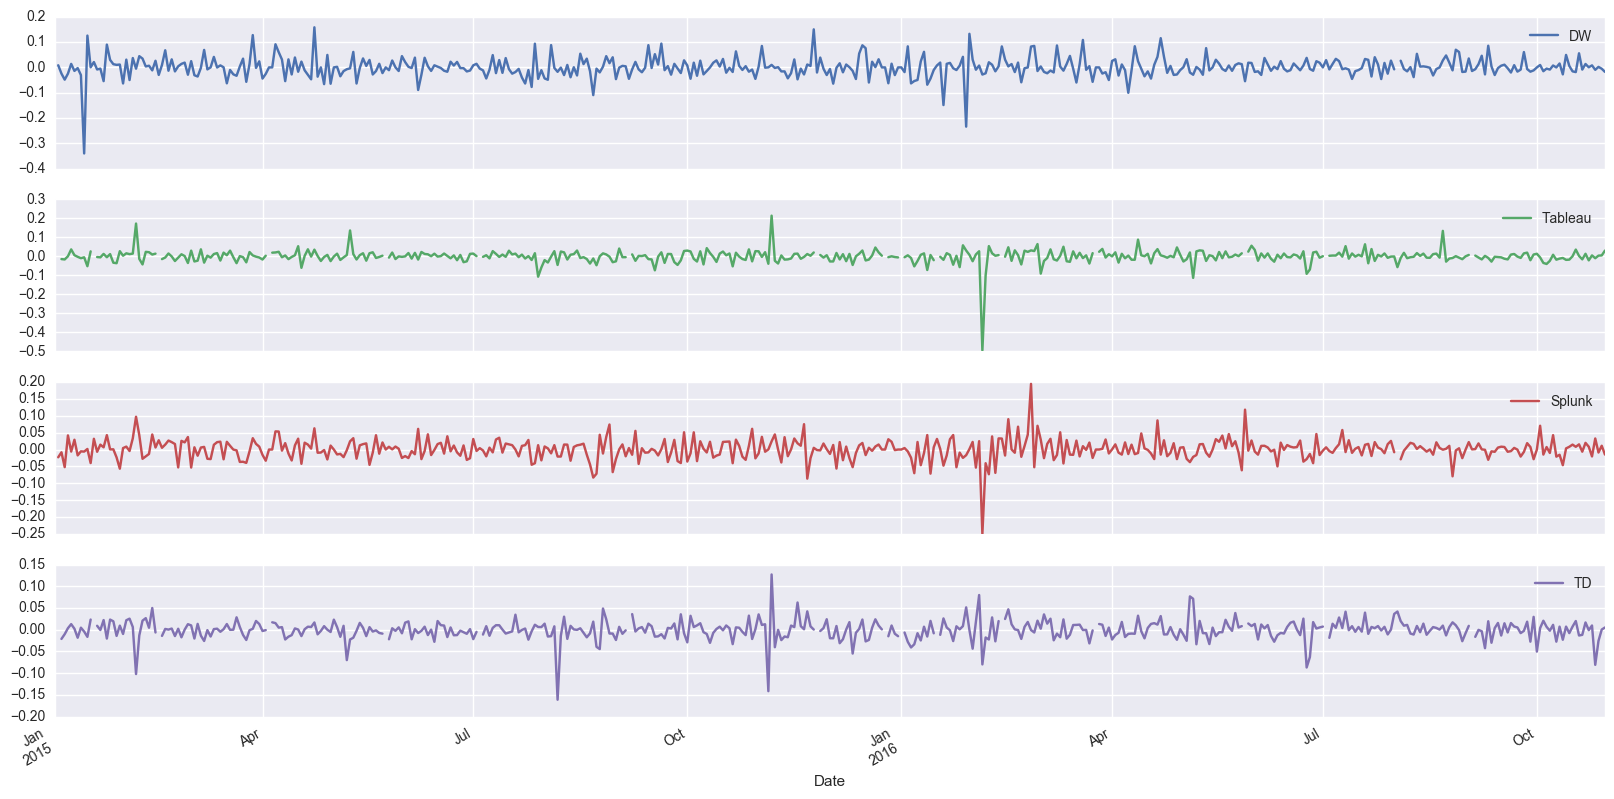

In [159]:
changePctVal.plot(legend=True,figsize=(20,10),subplots=True)

Clearly behavioural comparison can be easily made from the percentage change (daily returns)

Now we will use Seaborn package to visualise daily returns

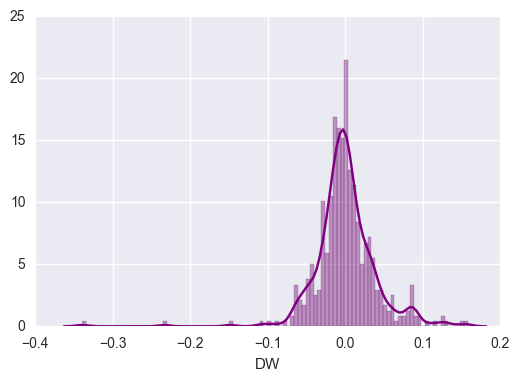

In [160]:
sns.distplot(changePctVal['DW'].dropna(),bins=100,color='purple')

We could have obtained the hostogram normally but seaborn gives us a much better view on the distribution as well.

Now we will compare stock closing values of different companies.

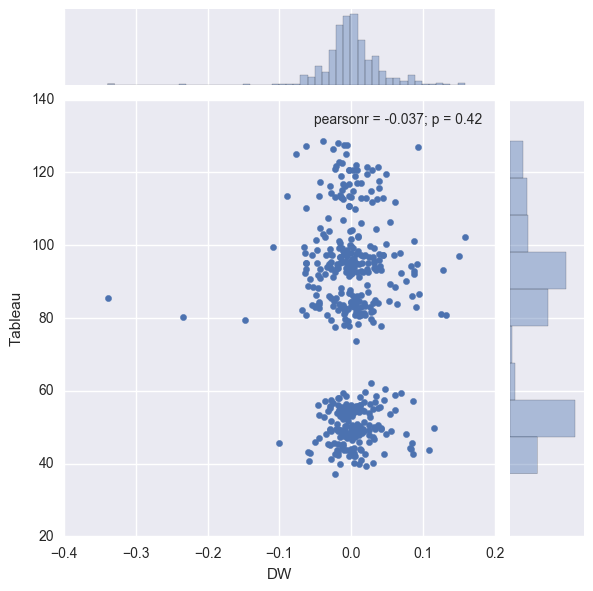

In [161]:
sns.jointplot(changePctVal['DW'],closingVal['Tableau'])

The above graph gives us a clear pcture of the correlation and also the distribution of the prices for 2 stocks.
We can play around with styling as well.

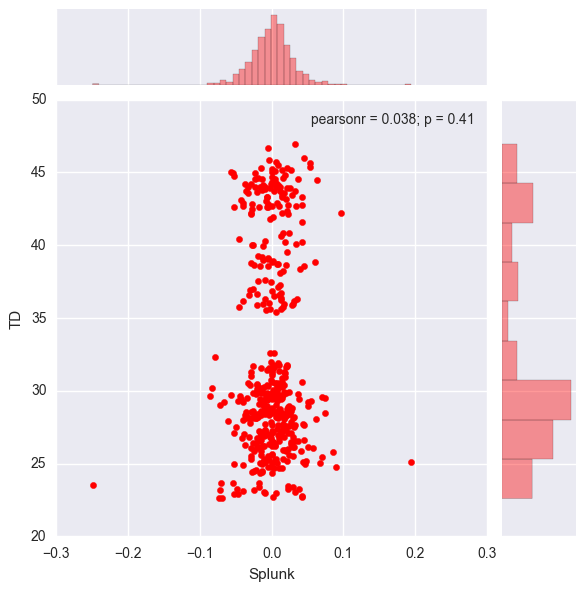

In [162]:
sns.jointplot(changePctVal['Splunk'],closingVal['TD'],color="red")

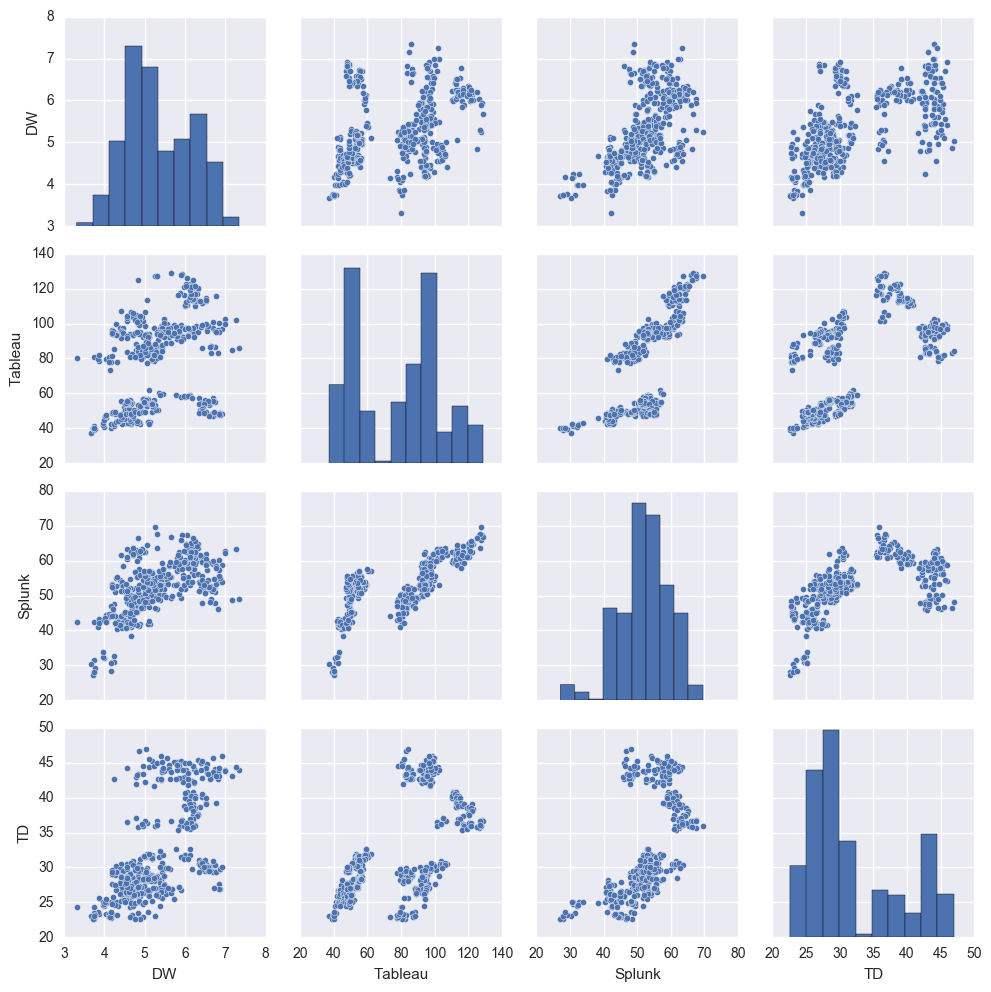

In [163]:
sns.pairplot(closingVal.dropna())

We use pairplot to get an overallview of the correlation

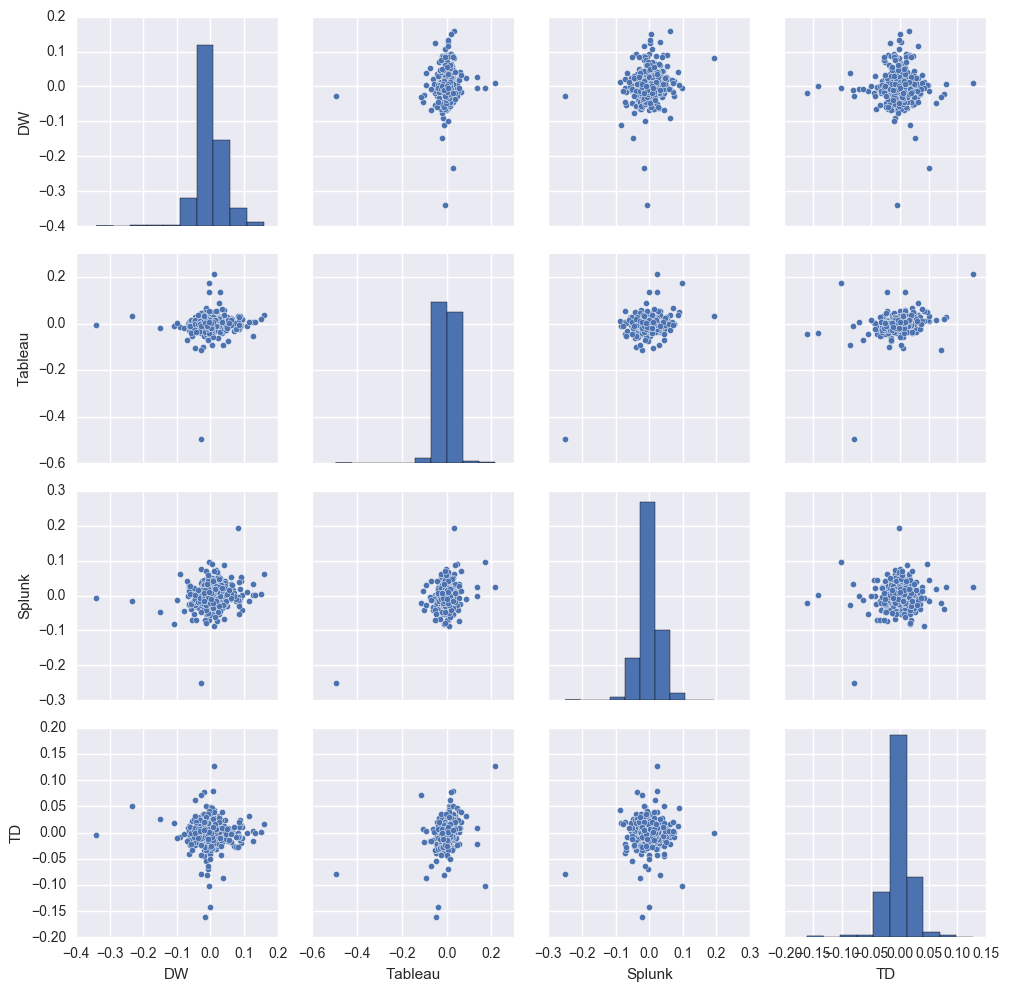

In [164]:
sns.pairplot(changePctVal.dropna())

We can visualise them in  some more way as follows.

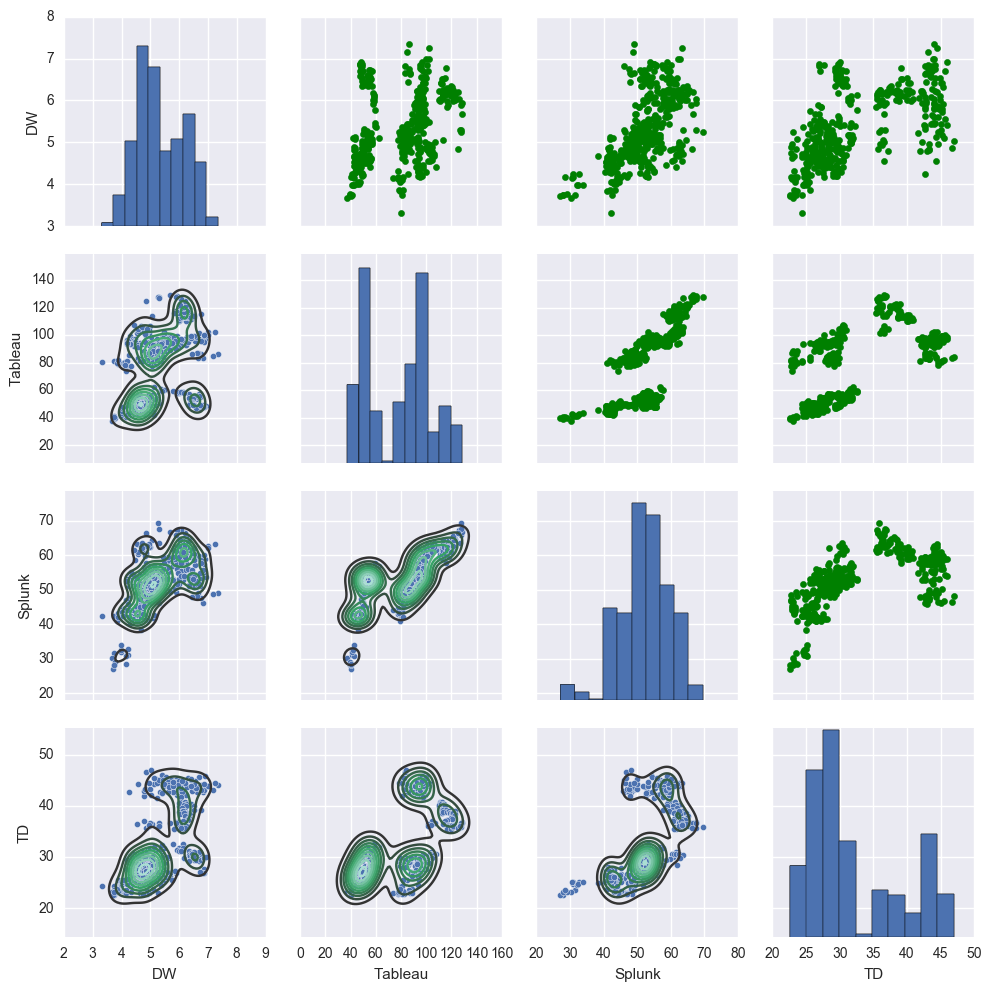

In [166]:
adjValPlot=sns.pairplot(closingVal.dropna())

adjValPlot.map_upper(plt.scatter,color="green")

adjValPlot.map_lower(sns.kdeplot,color="purple")

adjValPlot.map_diag(plt.hist,bins=10)

Let's get a correlation as well between each stocks

In [167]:
corrM=changePctVal.corr()
corrM

,DW,Tableau,Splunk,TD
DW,1.000000,0.086544,0.143379,0.000534
Tableau,0.086544,1.000000,0.341594,0.334614
Splunk,0.143379,0.341594,1.000000,0.065949
TD,0.000534,0.334614,0.065949,1.000000


We can visualise the above matrix as follows (annot=True gives more details to the visualisation)

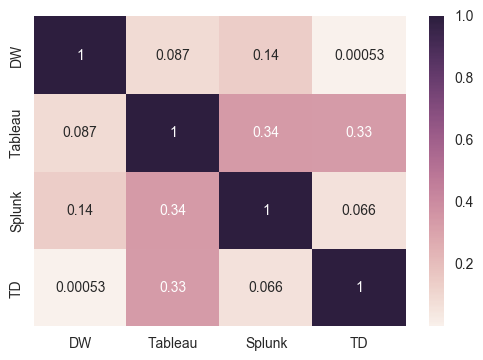

In [168]:
sns.heatmap(corrM,annot=True)

### Correlating and Predicting Stock Prices with Google Trends

We have seen the basics in exploring stock data. Now we would like to understand if we can predict stock price based on google trends.
For this we will look at the 10 Q reports for the companies.
10 Q is a comprehensive quarterly report describing about the comapnies financial position for a particular quarter.
In these reports companies mention about their strategies and some other details about the companies.
We will try to extract some of the important words for the above reports and correlate with the price trends.
For refernce you can have a look at the following papers:
1. http://www.forbes.com/sites/timworstall/2014/08/04/big-data-using-google-searches-to-predict-stock-market-falls/#36efb5767142
2. https://static.googleusercontent.com/media/www.google.com/en//googleblogs/pdfs/google_predicting_the_present.pdf




First we will define the quarter for which we want to generate correlations

In [169]:
end2=datetime(2015,3,31)
start2=datetime(2015,1,1)
dataWatch2=dataWatch.ix[start:end]
tableau2=tableau.ix[start:end]
teraData=teraData.ix[start:end]
splunk=splunk.ix[start:end]

We will take all the common words. Its a list of 10000 words provided by MIT. 
Stopwords are included in these words.

In [170]:
urlWords="http://www.mit.edu/~ecprice/wordlist.10000"
response= requests.get(urlWords)
commonWords=response.content.split("\n")

We will create a function to process the 10 Q report.  

In [292]:
def process(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    """ Normalizes case and handles punctuation
    Inputs:
        text: str: raw text
        lemmatizer: an instance of a class implementing the lemmatize() method
                    (the default argument is of type nltk.stem.wordnet.WordNetLemmatizer)
    Outputs:
        list(str): tokenized text
    """
    text=text.lower()
    text=text.replace('\'s','')
    
    text=text.replace('\'','')

    stopwords=nltk.corpus.stopwords.words('english')
    
    text=re.sub("\d"," ",text)

    lemmatizedtext=''
   
    tokens=[]
    for punct in string.punctuation:
        text=text.replace(punct,' ')       

    for token in nltk.word_tokenize(text) :
        
        try:
            if token not in commonWords:
                tokens.append(lemmatizer.lemmatize(token).encode())
                
          
        except:
            continue
    return tokens
    pass


Now we will get all html documents and process them according to our requirements

In [293]:
"""The urls can be obtained from sec.gov.in for each company"""
urlTera="https://www.sec.gov/Archives/edgar/data/816761/000081676115000015/tdc-033115x10q.htm"
urlDW="https://www.sec.gov/Archives/edgar/data/792130/000114420415065237/v422945_10k.htm"
urlTab="https://www.sec.gov/Archives/edgar/data/1303652/000130365215000018/a10qq12015.htm"
urlSpl="https://www.sec.gov/Archives/edgar/data/1353283/000135328315000013/a430201510q.htm"
urls=[urlTera,urlDW,urlTab,urlSpl]
corpus=[]
companies=["teradata","datawatch","tableau","splunk"]
for url in urls:
    response= requests.get(url)
    cleanr =re.compile('<.*?>')
    cleanr2=re.compile('&.+?;')
    str1=re.sub(cleanr,' ', response.content)
    str2=re.sub(cleanr2,' ', str1)
    corpus.append(" ".join(process(str2)))
    

We will use tfidf function to score each word and extract important words accordingly.

In [173]:
def tfidfFun(docs):
    """
    Create TFIDF matrix.  This function creates a TFIDF matrix from the
    docs input.

    Args:
        docs: list of strings, where each string represents a space-separated
              document
    
    Returns: tuple: (tfidf, all_words)
        tfidf: sparse matrix (in any scipy sparse format) of size (# docs) x
               (# total unique words), where i,j entry is TFIDF score for 
               document i and term j
        all_words: list of strings, where the ith element indicates the word
                   that corresponds to the ith column in the TFIDF matrix
    """
    colW=[]
    rowW=[]
    tfidfValue=[]
    
    
    dictDocs={}
    i=0
    wordsDoc=[]
    
    for idx,text in enumerate(docs):
        
        countDict=collections.Counter(text.split(" "))
        dictDocs[i] = countDict
        wordsDoc.extend(countDict.keys())
        i+=1
    
    all_words=collections.Counter(wordsDoc)
    
  
    idf={}

    
    for word,count in all_words.iteritems():
        idf[word] = math.log(len(dictDocs)*1.0/count)
   
    idfWords=idf.keys()
    
    for docN in dictDocs:
        
        for idfW,idfV in idf.iteritems():
            
            if(idfW in dictDocs[docN].keys()):
            
                tfidf = idfV*dictDocs[docN][idfW]
                if (tfidf!=0):
                    rowW.append(docN)

                    colW.append(idfWords.index(idfW))
                    
                    tfidfValue.append(tfidf)

    tfidf = sp.coo_matrix((tfidfValue, (rowW, colW)),shape=(len(dictDocs),len(idfWords)))

    return (tfidf,idfWords)
    pass

In [174]:
(tfidf, X) = tfidfFun(corpus)

Now we will get top 5 words for each company

In [175]:
mat_array =tfidf.toarray()

i=0
list_Features=[]
for l in mat_array:
    i+=1
    list_Features.append([(X[x]) for x in (l*-1).argsort() ][:5])

In [176]:
list_Features

[['teradata', 'repurchase', 'borrowing', 'notional', 'idw'],
 ['datawatch', 'panopticon', 'monarch', 'warrant', 'indefinite'],
 ['tableau', 'adversely', 'taxonomy', 'harmed', 'linkbase'],
 ['splunk', 'adversely', 'psus', 'landlord', 'nols']]

In [294]:
#from pytrends.pyGTrends import pyGTrends
from pytrends.request import TrendReq
import time
import os
from random import randint
import pandas as pd

# Add your Gmail username to the google_username variable and your Gmail password to the google_password variable.
google_username = "***"
google_password = "***"
pytrend = TrendReq(google_username, google_password)

path = "/Users/anmoljain/Desktop/Practical-DataScience/CreditSuisse/"

list_df=[]
list_df.append(pd.DataFrame(changePctVal['TD']))
# list_df.append(pd.DataFrame(changePctVal['DW']))
# list_df.append(pd.DataFrame(changePctVal['Tableau']))
# list_df.append(pd.DataFrame(changePctVal['Splunk']))

all_frames=pd.DataFrame()

keywordlist = pd.DataFrame(columns=["keyword","slope"])
for index1, row1 in enumerate(list_Features):
    for index,row in enumerate(row1):
        time.sleep(10)
        payload = {'date':'01/2015 3m','q':row} 
        
        df = pytrend.trend(payload, return_type='dataframe')

        changedTrend=df.pct_change()
        list_df[index1]=list_df[index1].join(pd.DataFrame(changedTrend[row]))
        time.sleep(15)
    break 
    
"""Details for teradata is enough for tutorial purpose
   Also the google api has limited number of searches. Hence we need put the system on sleep for sometime after every search
   You need to use your gmail id and passwrod to access the api"""


We will consider only Teradata for tuorial purpose.

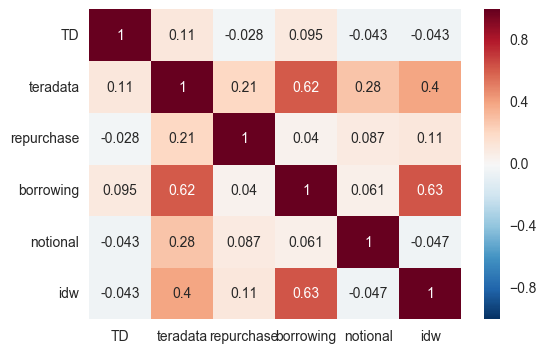

In [252]:
tdCorrChange=list_df[0]
snsM1=tdCorrChange.corr()
sns.heatmap(snsM1,annot=True)

We will try to predict the change ( positive or negative) in the stock prices by change in trend of selected words

In [253]:
tdCorrChange2=pd.DataFrame()
for col in tdCorrChange.columns:
    """For all positive change we will classify it as 1 
       and for negative as 0
    """
    tdCorrChange2[col]=np.where(tdCorrChange[col]>0,"1","0")

In [301]:
print tdCorrChange2.head() 

  TD teradata repurchase borrowing notional idw
0  0        0          0         0        0   0
1  0        1          1         1        1   1
2  0        1          1         1        1   1
3  0        1          1         0        1   0
4  1        1          1         0        0   0


Now we will make a function to train the model according to the categories.Since we are considering only 1 and 0
We will be using Naive Bayes Classifier.


In [302]:
class CategoricalPredictor:
    """ Feature predictor for a categorical feature.
        Attributes: 
            p (dict) : dictionary of vector containing per class probability of a feature value;
                    the keys of dictionary should exactly match the values taken by this feature
    """
    # feel free to define and use any more attributes, e.g., number of classes, etc
    def __init__(self, x, y, alpha=1) :
        """ initializes the predictor statistics (p) for Categorical distribution
        Inputs:
            x (array_like): feature values (categorical)
            y (array_like): class labels (0,...,k-1)
        """
        
        self.p={}

        categoryX=set(x)

        categoryY=set(y)
       
        for i,catX in enumerate(categoryX):
            
            prob=np.zeros(len(categoryY))
            for i,catY in enumerate(categoryY):
                prob[catY]=((len(x[(x==catX) & (y==catY)])+alpha)*1.0/(len(x[(y==catY)])+len(categoryX)*alpha))
                self.p[catX]=prob
                
                         

    def partial_log_likelihood(self, x):
        """ log likelihood of feature values x according to each class
        Inputs:
            x (array_like): vector of feature values
        Outputs:
            (array_like): matrix of log likelihood for this feature
        """
        
        likelihood=[]
        
        for val in x:
            likelihood.append(self.p[val])

        return np.log(likelihood)

        pass
    

Now we will create a Naive Bayes Classifier function

In [303]:
class NaiveBayesClassifier:
    """ Naive Bayes classifier for a mixture of continuous and categorical attributes.
        We use GaussianPredictor for continuous attributes and MultinomialPredictor for categorical ones.
        Attributes:
            predictor (dict): model for P(X_i|Y) for each i
            log_prior (array_like): log P(Y)
    """
   
    def __init__(self, df, alpha=1):
        """initializes predictors for each feature and computes class prior
        Inputs:
            df (pd.DataFrame): processed dataframe, without any missing values.
        """
        self.df=df
        self.l=len(df["TD"].unique())
        self.prior=np.zeros(self.l)
        self.prior=(np.array(collections.Counter(df["TD"]).values())+alpha)*1.0/(len(df["TD"])+len(df["TD"].unique())*alpha)
       
        
        self.log_prior=np.log(self.prior)
        self.predictor={}
        
        for col in df.columns:
            if df[col].dtype=="object" and col!="index" and col!="TD":
                self.predictor[col]=CategoricalPredictor(df[col], df['TD'],alpha)
       
        
        pass

    def predict(self, x):
        """ predicts label for input instances from log_prior and partial_log_likelihood of feature predictors
        Inputs:
            x (pd.DataFrame): processed dataframe, without any missing values and without class label.
        Outputs:
            (array_like): array of predicted class labels (0,..,k-1)
        """
        sumPartialLog=float(0.0)
        for col in self.df.columns:
            if col!="index" and col!="TD":
                sumPartialLog+=self.predictor[col].partial_log_likelihood(x[col])
        predicted=[]
        
        
        for val in sumPartialLog:
            predicted.append(np.argmax(val))
        return np.array(predicted)
        pass

In [307]:
nbc = NaivesBayesClassifier(tdCorrChange2)

/Users/anmoljain/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [308]:
"""Predicting values for the same set"""
y_pred = nbc.predict(tdCorrChange2)

Computing Error rate

In [309]:
count=0
l=len(y_pred)
for i in range(0,l):
    if str(y_pred[i])!=tdCorrChange2["TD"][i]:
        #print y_pred[i],tdCorrChange2["TD"][i]
        count+=1
print "Error: ",(count*1.0/l)

Error:  0.482254697286


The error rate is very high.
This is due to some of the following reasons:
1. We havent considered a correct time line.
    We need to look at more micro level, know when the actual news about the particular topic was released.
2. We need to consider more words.
3. We need to filter out non related words. (for eg. some financial terms must have appeared many itmes but might not be necessary for a big data company.
4. We need to consider other socio economic factors. We can also grab latest news from New York times or bloomberg api.


## Summary and References
In the initial stages, this tutotrial discussed about the basics of understanding stock market and using packages for the analysis.
Later we tried to predict stock prices based on comapny filings and using google trends.
Some other papers to read on this prediction method are :

http://cs229.stanford.edu/proj2015/200_report.pdf

http://dataconomy.com/a-team-of-researchers-has-found-a-way-to-predict-the-stock-market-using-search-terms/

References:

1.http://blog.yhat.com/posts/stock-data-python.html

2.Udemy-Learning Python for Data Analysis and Visualization. 

3.https://github.com/GeneralMills/pytrends/blob/master/examples/example.py